In [40]:
import pandas as pd

# Extracting marriage postal survey participant data

In [41]:
df = pd.read_csv('Resources/electorate-results.csv')
df.head()

,electoral_division,state,yes,no,response_clear,response_unclear,nonresponding
0,Banks,New South Wales,37736,46343,84079,247,20928
1,Barton,New South Wales,37153,47984,85137,226,24008
2,Bennelong,New South Wales,42943,43215,86158,244,19973
3,Berowra,New South Wales,48471,40369,88840,212,16038
4,Blaxland,New South Wales,20406,57926,78332,220,25883


# Extracting electorate division data

In [42]:
id_df = pd.read_csv('01-output_electoral_division/electoral_division.csv')
id_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


# Transforming the data to relevant table

In [43]:
df.dtypes

electoral_division    object
state                 object
yes                    int64
no                     int64
response_clear         int64
response_unclear       int64
nonresponding          int64
dtype: object

In [44]:
# merging with id_df dataframe
combined_df = pd.merge(df, id_df, how="outer", on="electoral_division")
combined_df.head()

,electoral_division,state_x,yes,no,response_clear,response_unclear,nonresponding,division_id,state_y
0,Banks,New South Wales,37736,46343,84079,247,20928,103,NSW
1,Barton,New South Wales,37153,47984,85137,226,24008,104,NSW
2,Bennelong,New South Wales,42943,43215,86158,244,19973,105,NSW
3,Berowra,New South Wales,48471,40369,88840,212,16038,106,NSW
4,Blaxland,New South Wales,20406,57926,78332,220,25883,107,NSW


In [45]:
# columns we want to keep, in the order we want to keep them
columns = ['division_id', 'yes', 'no' , 'response_clear' , 'response_unclear' , 'nonresponding']
combined_df = combined_df[columns]
combined_df.head()

,division_id,yes,no,response_clear,response_unclear,nonresponding
0,103,37736,46343,84079,247,20928
1,104,37153,47984,85137,226,24008
2,105,42943,43215,86158,244,19973
3,106,48471,40369,88840,212,16038
4,107,20406,57926,78332,220,25883


In [46]:
# renaming columns
combined_df.columns = ['division_id', 'yes_count', 'no_count' , 'total_responses' , 'response_unclear' , 'non_responding']

In [47]:
# are all the division id values unique?
combined_df['division_id'].is_unique

True

In [48]:
# setting the index as division_id
combined_df = combined_df.set_index("division_id")
combined_df.head()

,yes_count,no_count,total_responses,response_unclear,non_responding
division_id,,,,,
103,37736,46343,84079,247,20928
104,37153,47984,85137,226,24008
105,42943,43215,86158,244,19973
106,48471,40369,88840,212,16038
107,20406,57926,78332,220,25883


# Exploratory Analysis

In [49]:
# summary statistics table
combined_df.describe()

,yes_count,no_count,total_responses,response_unclear,non_responding
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,52114.980000,32493.246667,84608.226667,244.573333,21855.066667
std,12315.105174,8262.788938,10318.851968,55.895198,4197.465972
min,19026.000000,14860.000000,34924.000000,106.000000,13092.000000
25%,44619.750000,28452.250000,80220.750000,207.250000,18951.000000
50%,51782.500000,31653.500000,85726.500000,240.000000,21416.500000
75%,59878.750000,36726.750000,90369.750000,276.000000,24513.250000
max,89590.000000,57926.000000,120951.000000,377.000000,35841.000000


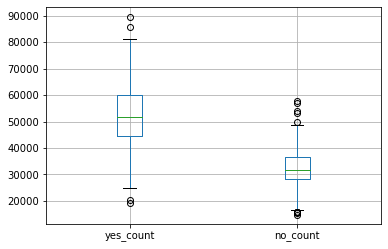

In [53]:
# box plot to investigate turnout data
combined_df.boxplot(column=['yes_count','no_count'])

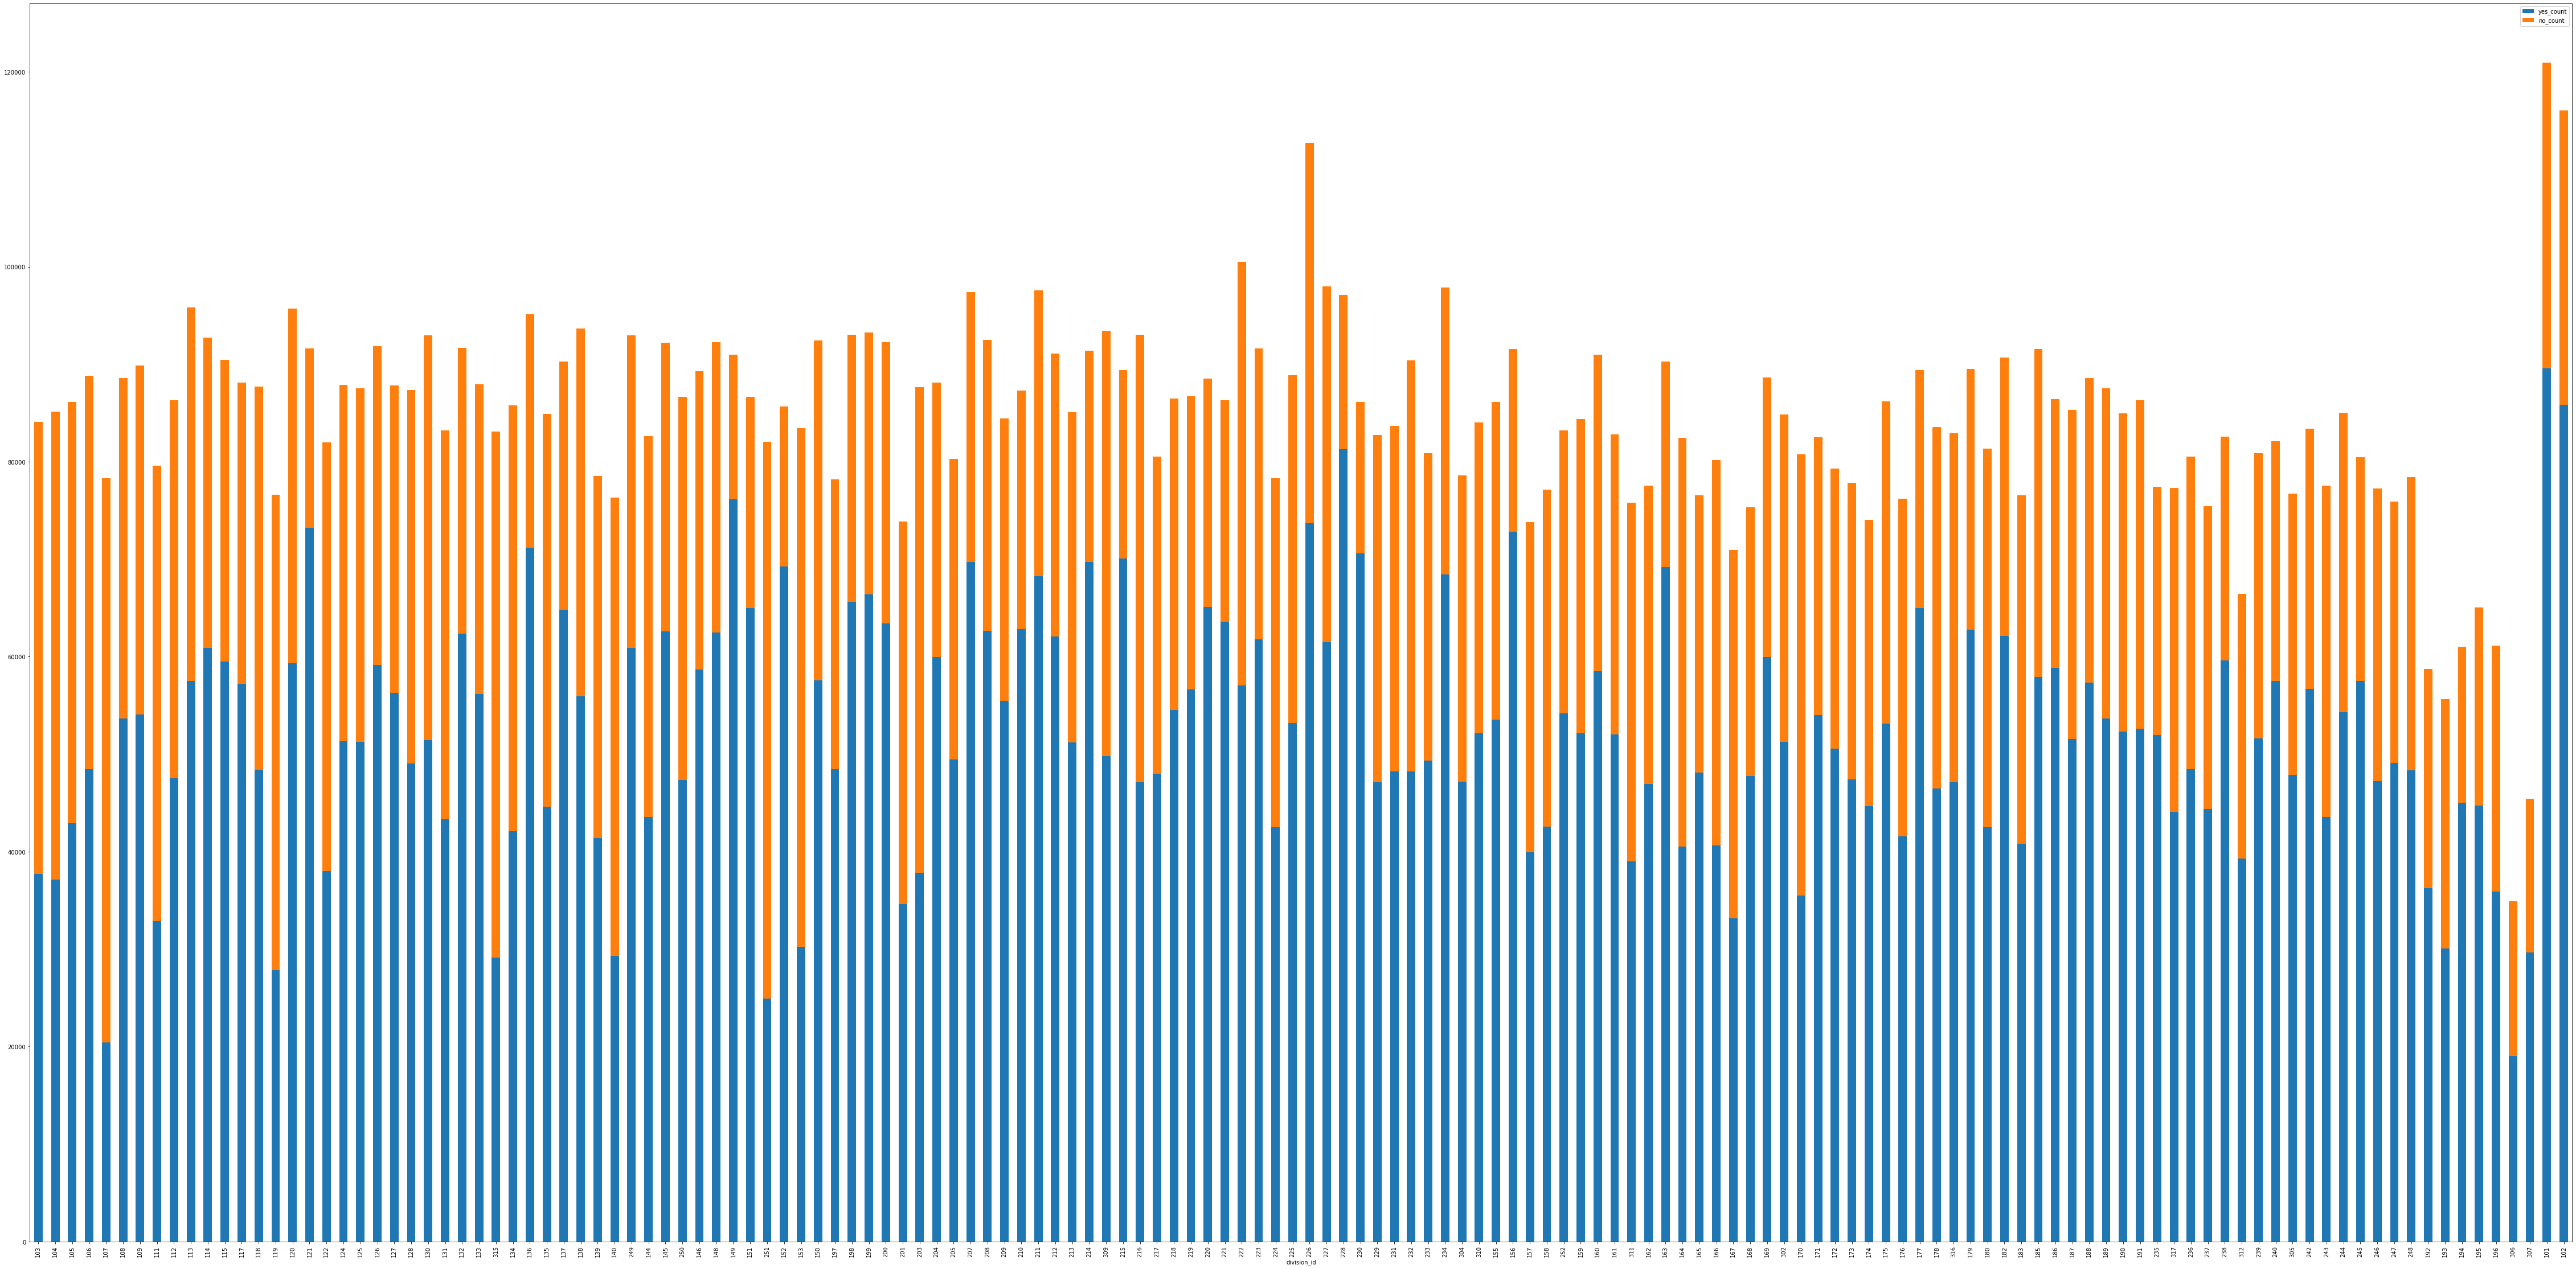

In [57]:
# stacked barchart to compare different types of yes or no votes for each electoral division
combined_df[['yes_count','no_count']].plot.bar(rot=90, stacked=True, figsize=(80,40))

# Exporting DataFrame to CSV 

In [58]:
combined_df.to_csv("05-output_marriage_postal_results/marriage_postal_results.csv")